## Imports

In [1]:
import pickle

import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

from sherlock_helpers.constants import DATA_DIR, EDGECOLOR, FIG_DIR
from sherlock_helpers.functions import draw_bounds, show_source

import matplotlib as mpl
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Helper functions and variables used across multiple notebooks can be found in `/mnt/code/sherlock_helpers/sherlock_helpers`, or on GitHub, [here](https://github.com/ContextLab/sherlock-topic-model-paper/tree/master/code/sherlock_helpers).<br />You can also view source code directly from the notebook with:<br /><pre>    from sherlock_helpers.functions import show_source<br />    show_source(foo)</pre>

## Insepct `draw_bounds` function

In [2]:
show_source(draw_bounds)

## Load data

In [3]:
video_model, recall_models = np.load(DATA_DIR.joinpath('models_t100_v50_r10.npy'), allow_pickle=True)
video_events = np.load(DATA_DIR.joinpath('video_events.npy'))

with DATA_DIR.joinpath('video_eventseg_model').open('rb') as f:
    video_eventseg_model = pickle.load(f)

with DATA_DIR.joinpath('recall_eventseg_models').open('rb') as f:
    recall_eventseg_models = pickle.load(f)

recall_events = np.load(DATA_DIR.joinpath('recall_events.npy'), allow_pickle=True)
avg_recall_events = np.load(DATA_DIR.joinpath('avg_recall_events.npy'))

In [4]:
video_corrmat = np.corrcoef(video_model)
p17_recall_model = recall_models[16]
p17_recall_corrmat = np.corrcoef(p17_recall_model)
p17_recall_events = recall_events[16]
p17_eventseg_model = recall_eventseg_models[16]
p17_matchmat = 1 - cdist(video_events, p17_recall_events, 'correlation')
avg_matchmat = 1 - cdist(video_events, avg_recall_events, 'correlation')

## Set plotting params

In [5]:
sns.set_context('paper')
mpl.rcParams['pdf.fonttype'] = 42
cmap = plt.cm.bone_r

## Plot figure

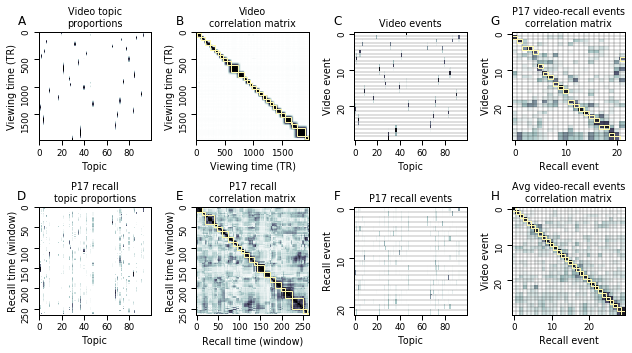

In [6]:
fig, axarr = plt.subplots(2,4)
(
    (a, b, c, g), 
    (d, e, f, h)
) = axarr

fig.set_size_inches(9, 5)

# video model
sns.heatmap(video_model, 
            xticklabels=20, 
            yticklabels=500, 
            vmin=0, 
            vmax=1, 
            cmap=cmap,
            cbar=False,
            ax=a)
a.set_title('Video topic\nproportions')
a.set_ylabel('Viewing time (TR)')
a.set_xlabel('Topic')
for spine in a.spines.values():
    spine.set_visible(True)

a.collections[0].remove()
a.imshow(video_model, aspect='auto', cmap=cmap)


# video correlation matrix
sns.heatmap(video_corrmat, 
            xticklabels=500, 
            yticklabels=500, 
            vmin=0, 
            vmax=1, 
            cmap=cmap, 
            cbar=False, 
            ax=b)
b.set_title('Video\ncorrelation matrix')
b.set_ylabel('Viewing time (TR)')
b.set_xlabel('Viewing time (TR)')
for spine in b.spines.values():
    spine.set_visible(True)

draw_bounds(b, video_eventseg_model)
b.collections[0].remove()
b.imshow(video_corrmat, aspect='auto', cmap=cmap)


# video events
sns.heatmap(video_events,
            xticklabels=20, 
            yticklabels=10, 
            vmin=0, 
            vmax=1, 
            cmap=cmap, 
            cbar=False, 
            ax=c)
c.set_title('Video events')
c.set_ylabel('Video event')
c.set_xlabel('Topic')
for spine in c.spines.values():
    spine.set_visible(True)

c.hlines(range(video_events.shape[0]), *c.get_xlim(), linewidth=.25)


# P17 recall model
sns.heatmap(p17_recall_model, 
            xticklabels=20, 
            yticklabels=50, 
            vmin=0, 
            vmax=1, 
            cmap=cmap, 
            cbar=False, 
            ax=d)
d.set_title('P17 recall\ntopic proportions')
d.set_ylabel('Recall time (window)')
d.set_xlabel('Topic')
for spine in d.spines.values():
    spine.set_visible(True)

d.collections[0].remove()
d.imshow(p17_recall_model, aspect='auto', cmap=cmap)
    

# P17 recall correlation matrix
sns.heatmap(p17_recall_corrmat, 
            xticklabels=50, 
            yticklabels=50, 
            vmin=0, 
            vmax=1, 
            cmap=cmap, 
            cbar=False, 
            ax=e)
e.set_title('P17 recall\ncorrelation matrix')
e.set_ylabel('Recall time (window)')
e.set_xlabel('Recall time (window)')
for spine in e.spines.values():
    spine.set_visible(True)

e.collections[0].remove()
draw_bounds(e, p17_eventseg_model)
e.imshow(p17_recall_corrmat, aspect='auto', cmap=cmap)


# recall events
sns.heatmap(p17_recall_events, 
            xticklabels=20, 
            yticklabels=10, 
            vmin=0, 
            vmax=1, 
            cmap=cmap, 
            cbar=False, 
            ax=f)
f.set_title('P17 recall events')
f.set_ylabel('Recall event')
f.set_xlabel('Topic')
for spine in f.spines.values():
    spine.set_visible(True)

f.hlines(range(p17_recall_events.shape[0]), *f.get_xlim(), linewidth=.25)


# P17 video-recall correlation matrix
sns.heatmap(p17_matchmat, 
            xticklabels=10, 
            yticklabels=10, 
            vmin=0, 
            vmax=1, 
            cmap=cmap, 
            cbar=False, 
            ax=g)
g.set_title('P17 video-recall events\ncorrelation matrix')
g.set_ylabel('Video event')
g.set_xlabel('Recall event')
for spine in g.spines.values():
    spine.set_visible(True)

g.hlines(range(video_events.shape[0]), *g.get_xlim(), linewidth=.25)
g.vlines(range(p17_recall_events.shape[0]), *g.get_ylim(), linewidth=.25)
bounds = np.argmax(p17_matchmat, axis=0)
for i, bound in enumerate(bounds):
    rect = patches.Rectangle((i, bound), 
                             1, 1, 
                             linewidth=1, 
                             edgecolor=EDGECOLOR, 
                             facecolor='none', 
                             zorder=2)
    g.add_patch(rect)

# average video recall correlation matrix
sns.heatmap(avg_matchmat, 
                xticklabels=10, 
                yticklabels=10, 
                vmin=0, 
                vmax=1, 
                cmap=cmap, 
                cbar=False, 
                ax=h)
h.set_title('Avg video-recall events\ncorrelation matrix')
h.set_ylabel('Video event')
h.set_xlabel('Recall event')
for spine in h.spines.values():
    spine.set_visible(True)

h.hlines(range(avg_matchmat.shape[0]), *h.get_xlim(), linewidth=.25)
h.vlines(range(avg_matchmat.shape[1]), *h.get_ylim(), linewidth=.25)
bounds = np.argmax(avg_matchmat, axis=0)
for i, bound in enumerate(bounds):
    rect = patches.Rectangle((i, bound), 
                             1, 1, 
                             linewidth=1, 
                             edgecolor=EDGECOLOR, 
                             facecolor='none', 
                             zorder=2)
    h.add_patch(rect)
    
# add labels
labels = 'ABCDEFGH'
for ax, l in zip([a, b, c, d, e, f, g, h], labels):
    ax.text(-.15, 1.07, 
            l, 
            horizontalalignment='center', 
            transform=ax.transAxes, 
            fontsize=12)

# adjust spacing
plt.subplots_adjust(wspace=.45, hspace=.75)
plt.tight_layout()
# plt.savefig(FIG_DIR.joinpath('eventseg.pdf'), dpi=1000)
plt.show()